In [1]:
import pandas as pd

In [2]:
f = "../work_dir/bin_pred_conf/bin_pred_ann.xlsx"
df = pd.read_excel(f)
print(df)

     Unnamed: 0  camera_view  gondola_id  shelf_id correct  empty_bin  \
0            14          101           3         1   False        0.0   
1            15          101           3         2   False        0.0   
2            16          101           3         3    True        0.0   
3            17          101           3         4    True        0.0   
4            18          101           3         5    True        0.0   
..          ...          ...         ...       ...     ...        ...   
147         140          121           8         3    True        0.0   
148         141          121           8         4   False        0.0   
149         142          121           8         5    True        0.0   
150         143          121           8         6    True        0.0   
151         144          121           8         7    True        1.0   

     wrong_seq  wrong_gondola  avg_score  min_score  \
0          0.0            0.0   0.799808   0.540421   
1          0.

In [3]:
empty_bin = df['empty_bin']
wrong_seq = df['wrong_seq']
wrong_gondola = df['wrong_gondola']

In [4]:
total_empty_bin = empty_bin.sum()
total_wrong_seq = wrong_seq.sum()
total_wrong_gondola = wrong_gondola.sum()

In [5]:
total_cases = len(df)
print(total_cases)

152


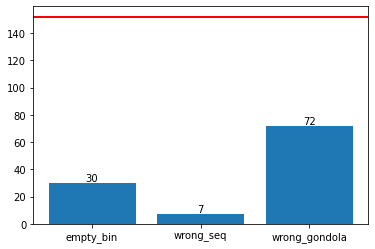

In [17]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
p = ax.bar(np.arange(3), (total_empty_bin, total_wrong_seq, total_wrong_gondola))
ax.axhline(total_cases, color = 'red', linewidth = 2)
ax.set_xticks(np.arange(3), ('empty_bin', 'wrong_seq', 'wrong_gondola'))

# bars = ax.barh(np.arange(3), width = 1, height = (total_empty_bin, total_wrong_seq, total_wrong_gondola))
ax.bar_label(p, label_type='edge')
# plt.show()
plt.savefig("../work_dir/bin_pred_conf/bar_plot_of_cases.jpg")


In [10]:
valid_df = df[(df["correct"] == True) | (df["correct"] == False)]
print(valid_df)

     Unnamed: 0  camera_view  gondola_id  shelf_id correct  empty_bin  \
0            14          101           3         1   False        0.0   
1            15          101           3         2   False        0.0   
2            16          101           3         3    True        0.0   
3            17          101           3         4    True        0.0   
4            18          101           3         5    True        0.0   
..          ...          ...         ...       ...     ...        ...   
147         140          121           8         3    True        0.0   
148         141          121           8         4   False        0.0   
149         142          121           8         5    True        0.0   
150         143          121           8         6    True        0.0   
151         144          121           8         7    True        1.0   

     wrong_seq  wrong_gondola  avg_score  min_score  \
0          0.0            0.0   0.799808   0.540421   
1          0.

In [20]:
import numpy as np
avg_scores = np.array(valid_df.avg_score)
min_scores = np.array(valid_df.min_score)
corrects = np.array(valid_df.correct, dtype=int)

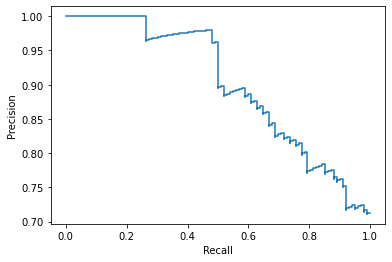

In [25]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt
precision, recall, _ = precision_recall_curve(corrects, avg_scores)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.savefig("../work_dir/bin_pred_conf/prc_of_avg_score.jpg")

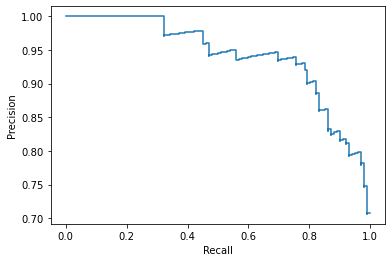

In [26]:
precision, recall, _ = precision_recall_curve(corrects, min_scores)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.savefig("../work_dir/bin_pred_conf/prc_of_min_score.jpg")